<a href="https://colab.research.google.com/github/JS0501/ESAA-YB3/blob/main/%EB%AF%B8%EB%8B%88(1)_1%2610_%EB%AF%B8%EC%99%84%EC%84%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import lightgbm as lgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

# 데이터 불러오기
train = pd.read_csv('/content/drive/MyDrive/movies_train.csv')
test = pd.read_csv('/content/drive/MyDrive/movies_test.csv')
submission = pd.read_csv('/content/drive/MyDrive/submission.csv')

Mounted at /content/drive


## **데이터 전처리**

*   fillna 함수로 결측치 채우기
*   inplace = True 로 저장



In [ ]:
train['dir_prev_bfnum'].fillna(0, inplace=True)

<ipython-input-2-10ebe2d7cfda>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['dir_prev_bfnum'].fillna(0, inplace=True)


In [ ]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


## **데이터 시각화**

### **1. 계절에 따른 장르별 관객 수**

In [ ]:
def get_season(release_time):
  # release_time에서 월을 추출
  month = release_time.month

  # 각 월에 맞는 계절을 결정
  if month in [3,4,5]:
    return 'spring'
  elif month in [6,7,8]:
    return 'summer'
  elif month in [9,10]:
    return 'autumn'
  elif month in [11,12,1,2]:
    return 'winter'

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51208 (\N{HANGUL SYLLABLE JEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/us

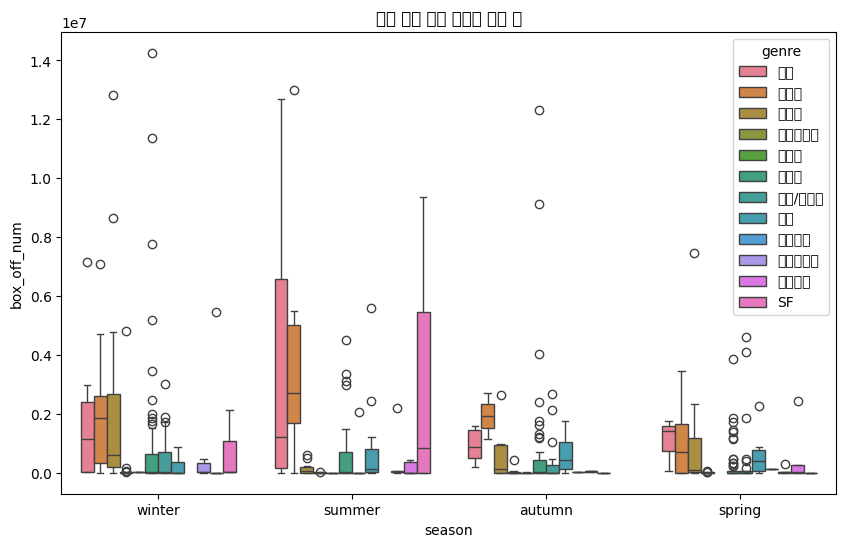

In [ ]:
from datetime import datetime

# release_time을 datetime으로 변환
train['release_time'] = pd.to_datetime(train['release_time'])

# 계절 컬럼 추가
train['season'] = train['release_time'].apply(get_season)

# 박스플롯 그리기
plt.figure(figsize=(10,6))
sns.boxplot(x='season', y='box_off_num', hue='genre', data=train)
plt.title('계절 별로 그린 장르별 관객 수')
plt.show()

#### 장르가 너무 많아서 일단 계절별 장르만 봐야겠음

In [ ]:
# from matplotlib import font_manager

# 'HYGraphic 중간' 폰트 경로 지정 (Windows의 경우 폰트 파일이 C:\Windows\Fonts에 있음)
#font_path = "C:\\Windows\\Fonts\\Bahnschrift.ttf"  # 'HYGraphic 중간' 폰트 파일 경로 지정
#fontprop = font_manager.FontProperties(fname=font_path)

# matplotlib에서 한글 폰트 사용 설정
#plt.rcParams['font.family'] = fontprop.get_name()  # 기본 폰트로 설정
# plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨지는 문제 해결
# 폰트가 안됨...

In [ ]:
#season_genre_avg = train.groupby(['season', 'genre'])['box_off_num'].mean().reset_index()
#g = sns.FacetGrid(season_genre_avg, col='season', col_wrap=2, height=4, aspect=1.5)
#g.map(sns.barplot, 'genre', 'box_off_num', order=season_genre_avg['genre'].unique())
#g.set_titles('{col_name} 계절')
#g.set_axis_labels('장르', '평균 관객 수')
#plt.subplots_adjust(top=0.9)  # 타이틀 위치 조정
#g.fig.suptitle('계절별 장르별 평균 관객 수')  # 전체 제목 설정
#plt.show()

<ipython-input-8-77c1d8a08eb7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='box_off_num', data=monthly_box_off, palette='viridis')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N

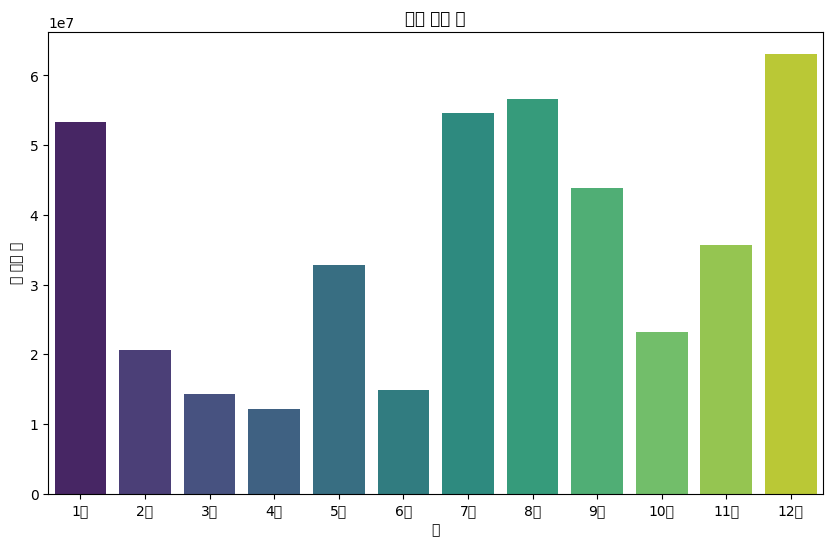

In [ ]:
# 월을 추출하여 새로운 컬럼 'month' 추가
train['month'] = train['release_time'].dt.month

# 월별 관객 수 합계 계산
monthly_box_off = train.groupby('month')['box_off_num'].sum().reset_index()

# 월별 관객 수 시각화 (막대그래프)
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='box_off_num', data=monthly_box_off, palette='viridis')
plt.title('월별 관객 수')
plt.xlabel('월')
plt.ylabel('총 관객 수')
plt.xticks(ticks=range(12), labels=['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'])
plt.show()

### 봄에는 5월이, 여름에는 8월이, 가을에는 9월이, 겨울에는 12, 1월이 가장 관객 수가 많다.
### 각각의 월별 장르를 살펴보자

### **봄**

In [ ]:
# DataFrame 생성
train = pd.DataFrame(train)

# release_time을 datetime 형식으로 변환
train['release_time'] = pd.to_datetime(train['release_time'])

# 5월 데이터만 필터링
train_may = train[train['release_time'].dt.month == 5]

# 장르별로 관객 수 합산
genre_box_off_may = train_may.groupby('genre')['box_off_num'].sum().reset_index()

# 관객 수를 기준으로 내림차순 정렬하고, 상위 5개 장르 선택
top_5_genres = genre_box_off_may.sort_values(by='box_off_num', ascending=False).head(5)

# 결과 출력
print("5월 중 가장 많은 관객을 기록한 상위 5개 장르:")
print(top_5_genres)

5월 중 가장 많은 관객을 기록한 상위 5개 장르:
    genre  box_off_num
8     코미디     12906860
3     드라마      6340244
1     느와르      5643838
4  멜로/로맨스      4608221
0      공포      3134965


#### 봄엔 코미디가 압도적으로 많고 나머지는 비슷한 편이다

### **여름**

In [ ]:
# DataFrame 생성
train = pd.DataFrame(train)

# release_time을 datetime 형식으로 변환
train['release_time'] = pd.to_datetime(train['release_time'])

# 8월 데이터만 필터링
train_aug = train[train['release_time'].dt.month == 8]

# 장르별로 관객 수 합산
genre_box_off_aug = train_aug.groupby('genre')['box_off_num'].sum().reset_index()

# 관객 수를 기준으로 내림차순 정렬하고, 상위 5개 장르 선택
top_5_genres_aug = genre_box_off_aug.sort_values(by='box_off_num', ascending=False).head(5)

# 결과 출력
print("8월 중 가장 많은 관객을 기록한 상위 5개 장르:")
print(top_5_genres_aug)

8월 중 가장 많은 관객을 기록한 상위 5개 장르:
  genre  box_off_num
0    SF     20261544
8    액션     15640582
1    공포      8696468
4   드라마      6215167
2   느와르      3464335


#### 여름엔 SF가 압도적으로 많고 그 다음 액션, 공포도 꽤나 많다

### **가을**

In [ ]:
# DataFrame 생성
train = pd.DataFrame(train)

# release_time을 datetime 형식으로 변환
train['release_time'] = pd.to_datetime(train['release_time'])

# 9월 데이터만 필터링
train_sep = train[train['release_time'].dt.month == 9]

# 장르별로 관객 수 합산
genre_box_off_sep = train_sep.groupby('genre')['box_off_num'].sum().reset_index()

# 관객 수를 기준으로 내림차순 정렬하고, 상위 5개 장르 선택
top_5_genres_sep = genre_box_off_sep.sort_values(by='box_off_num', ascending=False).head(5)

# 결과 출력
print("9월 중 가장 많은 관객을 기록한 상위 5개 장르:")
print(top_5_genres_sep)

9월 중 가장 많은 관객을 기록한 상위 5개 장르:
    genre  box_off_num
2     드라마     33136049
8     코미디      4178216
3  멜로/로맨스      2708987
7      액션      2626742
0      공포       709400


#### 가을엔 드라마가 압도적으로 많다 (자리수까지 차이...)

### **겨울**

In [ ]:
# DataFrame 생성
train = pd.DataFrame(train)

# release_time을 datetime 형식으로 변환
train['release_time'] = pd.to_datetime(train['release_time'])

# 12월 데이터만 필터링
train_dec = train[train['release_time'].dt.month == 12]

# 장르별로 관객 수 합산
genre_box_off_dec = train_dec.groupby('genre')['box_off_num'].sum().reset_index()

# 관객 수를 기준으로 내림차순 정렬하고, 상위 5개 장르 선택
top_5_genres_dec = genre_box_off_dec.sort_values(by='box_off_num', ascending=False).head(5)

# 결과 출력
print("12월 중 가장 많은 관객을 기록한 상위 5개 장르:")
print(top_5_genres_dec)

# ---------------------------------------------------

train_jan = train[train['release_time'].dt.month == 1]

# 장르별로 관객 수 합산
genre_box_off_jan = train_jan.groupby('genre')['box_off_num'].sum().reset_index()

# 관객 수를 기준으로 내림차순 정렬하고, 상위 5개 장르 선택
top_5_genres_jan = genre_box_off_jan.sort_values(by='box_off_num', ascending=False).head(5)

# 결과 출력
print("1월 중 가장 많은 관객을 기록한 상위 5개 장르:")
print(top_5_genres_jan)

12월 중 가장 많은 관객을 기록한 상위 5개 장르:
    genre  box_off_num
4     드라마     47990137
8     코미디      5773555
5  멜로/로맨스      4456464
2     느와르      4346165
7   애니메이션       471445
1월 중 가장 많은 관객을 기록한 상위 5개 장르:
    genre  box_off_num
7     코미디     31168153
3     드라마      9901962
6      액션      9358808
4  멜로/로맨스      2189474
5   애니메이션       479280


#### 막대그래프에서 12, 1월이 비슷해서 둘 다 출력해봤는데 12월은 드라마가, 1월은 코미디가 압도적으로 많다
#### 흥행 영화가 개봉했던 것일까

### **10. 개봉 시기에 따른 흥행 여부**

#### 1, 10번 주제가 연결되니 나누지 말고 일단 쭉

## **봄**

In [ ]:
# DataFrame 생성
train = pd.DataFrame(train)

# release_time을 datetime 형식으로 변환
train['release_time'] = pd.to_datetime(train['release_time'])

# 봄(3, 4, 5월) 데이터만 필터링
train_spring = train[train['release_time'].dt.month.isin([3, 4, 5])]

# 장르가 '코미디'인 데이터만 필터링
train_spring_comedy = train_spring[train_spring['genre'] == '코미디']

# 'screening_rat'에 따른 나이 제한의 빈도 계산
screening_counts = train_spring_comedy['screening_rat'].value_counts()

# 가장 많이 나타나는 상위 3개 나이 제한 선택
top_3_screening = screening_counts.head(3)

# 결과 출력
print("봄 시즌 코미디 영화에서 가장 많이 나타나는 상위 3개 나이 제한:")
print(top_3_screening)

봄 시즌 코미디 영화에서 가장 많이 나타나는 상위 3개 나이 제한:
screening_rat
15세 관람가    8
전체 관람가     1
12세 관람가    1
Name: count, dtype: int64


####  코미디다 보니 청불은 없고 15세 정도가 가장 많은듯

In [ ]:
# 제작사별 영화 수를 계산
distributor_counts = train_spring_comedy['distributor'].value_counts()

# 가장 많이 나타나는 상위 3개 제작사 선택
top_3_distributors = distributor_counts.head(3)

# 결과 출력
print("봄 시즌 코미디 영화에서 가장 많이 나타나는 상위 3개 제작사:")
print(top_3_distributors)

봄 시즌 코미디 영화에서 가장 많이 나타나는 상위 3개 제작사:
distributor
CJ 엔터테인먼트          2
CJ E&M Pictures    1
드림팩트 엔터테인먼트        1
Name: count, dtype: int64


#### 제작사는 그냥 비슷비슷한듯

In [ ]:
# 관객 수를 기준으로 상위 3개 영화 제목을 선택
top_3_movies = train_spring_comedy.nlargest(3, 'box_off_num')[['title', 'box_off_num']]

# 결과 출력
print("봄 시즌 코미디 영화 중 관객 수가 가장 많았던 상위 3개 영화:")
print(top_3_movies)

봄 시즌 코미디 영화 중 관객 수가 가장 많았던 상위 3개 영화:
    title  box_off_num
16     써니      7453715
536   스파이      2318748
110   차형사      1346754


#### 써니가 봄/코미디 중 가장 관객 수가 많다..
#### 써니 영화의 특징을 살펴보자

In [ ]:
# title이 '써니'인 행만 필터링
sunny_movie = train_spring_comedy[train_spring_comedy['title'] == '써니']

# 결과 출력
print("봄 시즌 코미디 영화 중 '써니' 제목을 가진 영화:")
print(sunny_movie)

봄 시즌 코미디 영화 중 '써니' 제목을 가진 영화:
   title      distributor genre release_time  time screening_rat director  \
16    써니  CJ E&M Pictures   코미디   2011-05-04   124       15세 관람가      강형철   

    dir_prev_bfnum  dir_prev_num  num_staff  num_actor  box_off_num  season  \
16       8223342.0             1        572         11      7453715  spring   

    month  
16      5  


#### 스탭 수가 많아 보이는데 보통 스탭 수가 어느 정도지?

In [ ]:
num_staff_stats = train_spring_comedy['num_staff'].describe()

# 결과 출력
print("봄 시즌 코미디 영화의 스탭 수 통계량:")
print(num_staff_stats)

봄 시즌 코미디 영화의 스탭 수 통계량:
count     11.000000
mean     215.454545
std      167.192921
min       14.000000
25%      102.500000
50%      191.000000
75%      292.000000
max      572.000000
Name: num_staff, dtype: float64


#### **써니 영화가 최대 스탭 수를 가짐**

#### 써니 제작사인 CJ E&M Pictures 여기가 원래 스탭 수가 많은걸까

In [ ]:
# 'CJ E&M Pictures' 제작사의 데이터만 필터링
cj_pictures = train[train['distributor'] == 'CJ E&M Pictures']

# 스탭 수에 대한 통계량 출력
num_staff_stats_cj = cj_pictures['num_staff'].describe()

# 결과 출력
print("CJ E&M Pictures 제작사의 스탭 수 통계량:")
print(num_staff_stats_cj)

CJ E&M Pictures 제작사의 스탭 수 통계량:
count      2.000000
mean     335.000000
std      335.168614
min       98.000000
25%      216.500000
50%      335.000000
75%      453.500000
max      572.000000
Name: num_staff, dtype: float64


#### CJ E&M Pictures 제작사가 스탭 수가 많은 편인 것 같은데 써니는 그 중에서도 가장 스탭 수가 많았던 영화임

In [ ]:
# 전체 스탭 수에 대한 통계량 출력
num_staff_stats_all = train['num_staff'].describe()

# 결과 출력
print("전체 스탭 수 통계량:")
print(num_staff_stats_all)

전체 스탭 수 통계량:
count    600.000000
mean     151.118333
std      165.654671
min        0.000000
25%       17.000000
50%       82.500000
75%      264.000000
max      869.000000
Name: num_staff, dtype: float64


#### 봄 시즌 뿐만 아니라 전체적으로 봐도 써니의 스탭 수는 꽤나 많은 편

# **봄/코미디**

## **여름(SF)**

In [23]:
# DataFrame 생성
train = pd.DataFrame(train)

# release_time을 datetime 형식으로 변환
train['release_time'] = pd.to_datetime(train['release_time'])

# 여름 (6,7,8월) 데이터만 필터링
train_summer = train[train['release_time'].dt.month.isin([6, 7, 8])]

# 장르가 'SF'인 데이터만 필터링
train_summer_SF = train_summer[train_summer['genre'] == 'SF']

# 'screening_rat'에 따른 나이 제한의 빈도 계산
screening_counts = train_summer_SF['screening_rat'].value_counts()

# 가장 많이 나타나는 상위 3개 나이 제한 선택
top_3_screening = screening_counts.head(3)

# 결과 출력
print("여름 시즌 SF 영화에서 가장 많이 나타나는 상위 3개 나이 제한:")
print(top_3_screening)

여름 시즌 SF 영화에서 가장 많이 나타나는 상위 3개 나이 제한:
screening_rat
15세 관람가     3
12세 관람가     2
청소년 관람불가    2
Name: count, dtype: int64


유의미x

In [24]:
# 제작사별 영화 수를 계산
distributor_counts = train_summer_SF['distributor'].value_counts()

# 가장 많이 나타나는 상위 3개 제작사 선택
top_3_distributors = distributor_counts.head(3)

# 결과 출력
print("여름 시즌 SF 영화에서 가장 많이 나타나는 상위 3개 제작사:")
print(top_3_distributors)

여름 시즌 SF 영화에서 가장 많이 나타나는 상위 3개 제작사:
distributor
인디스토리        2
CJ 엔터테인먼트    2
(주)더픽쳐스      1
Name: count, dtype: int64


유의미 x

In [25]:
# 관객 수를 기준으로 상위 3개 영화 제목을 선택
top_3_movies = train_summer_SF.nlargest(3, 'box_off_num')[['title', 'box_off_num']]

# 결과 출력
print("여름 시즌 SF 영화 중 관객 수가 가장 많았던 상위 3개 영화:")
print(top_3_movies)

여름 시즌 SF 영화 중 관객 수가 가장 많았던 상위 3개 영화:
            title  box_off_num
496          설국열차      9350351
505  해적: 바다로 간 산적      8666208
166           7광구      2242510


### 설국 열차랑 해적이 압도적으로 많은 관객 수

In [28]:
# title이 '설국열차'인 행만 필터링
sulguk_movie = train_summer_SF[train_summer_SF['title'] == '설국열차']

# 결과 출력
print("여름 시즌 SF 영화 중 '설국열차' 제목을 가진 영화:")
print(sulguk_movie)

여름 시즌 SF 영화 중 '설국열차' 제목을 가진 영화:
    title distributor genre release_time  time screening_rat director  \
496  설국열차   CJ 엔터테인먼트    SF   2013-08-01   125       15세 관람가      봉준호   

     dir_prev_bfnum  dir_prev_num  num_staff  num_actor  box_off_num  season  \
496             0.0             0         67         10      9350351  summer   

     month  
496      8  


스탭 수가 다른 1위 영화들에 비해 많지는 않은 듯
CJ 엔터의 스탭 수, 봉준호의 스탭 수를 보자

In [29]:
# title이 '해적: 바다로 간 산적'인 행만 필터링
haejeok_movie = train_summer_SF[train_summer_SF['title'] == '해적: 바다로 간 산적']

# 결과 출력
print("여름 시즌 SF 영화 중 '해적: 바다로 간 산적' 제목을 가진 영화:")
print(haejeok_movie)

여름 시즌 SF 영화 중 '해적: 바다로 간 산적' 제목을 가진 영화:
            title distributor genre release_time  time screening_rat director  \
505  해적: 바다로 간 산적    롯데엔터테인먼트    SF   2014-08-06   130       12세 관람가      이석훈   

     dir_prev_bfnum  dir_prev_num  num_staff  num_actor  box_off_num  season  \
505    1.843895e+06             3        868          2      8666208  summer   

     month  
505      8  


### 해적도 스탭 수가 많음...

In [31]:
# 'CJ 엔터테인먼트' 제작사의 데이터만 필터링
cj_pictures1 = train[train['distributor'] == 'CJ 엔터테인먼트']

# 스탭 수에 대한 통계량 출력
num_staff_stats_cj1 = cj_pictures1['num_staff'].describe()

# 결과 출력
print("CJ 엔터테인먼트 제작사의 스탭 수 통계량:")
print(num_staff_stats_cj1)

CJ 엔터테인먼트 제작사의 스탭 수 통계량:
count     54.000000
mean     313.629630
std      185.305693
min        0.000000
25%      158.250000
50%      339.000000
75%      435.500000
max      869.000000
Name: num_staff, dtype: float64


## **CJ엔터의 스탭 수는 꽤나 많은 편**
## **설국열차 스탭 수는 67명인데.. 이걸 보면 흥행 영화라고 꼭 스탭 수가 많은건 아닌듯**

### 해적을 만든 롯데 엔터는 보통 스탭 수가 어느 정도?

In [32]:
# '롯데엔터테인먼트' 제작사의 데이터만 필터링
lotte_pictures = train[train['distributor'] == '롯데엔터테인먼트']

# 스탭 수에 대한 통계량 출력
num_staff_stats_lotte = lotte_pictures['num_staff'].describe()

# 결과 출력
print("롯데엔터테인먼트 제작사의 스탭 수 통계량:")
print(num_staff_stats_lotte)

롯데엔터테인먼트 제작사의 스탭 수 통계량:
count     52.000000
mean     312.000000
std      162.824337
min        2.000000
25%      236.000000
50%      293.000000
75%      372.000000
max      868.000000
Name: num_staff, dtype: float64


### 해적 영화에 스탭 868명인데 이게 롯데 영화 엔터의 최대 스탭

# **가을/드라마**

In [33]:
# DataFrame 생성
train = pd.DataFrame(train)

# release_time을 datetime 형식으로 변환
train['release_time'] = pd.to_datetime(train['release_time'])

# 가을(9,10월) 데이터만 필터링
train_autumn = train[train['release_time'].dt.month.isin([9,10])]

# 장르가 'SF'인 데이터만 필터링
train_autumn_drama = train_summer[train_summer['genre'] == '드라마']

# 'screening_rat'에 따른 나이 제한의 빈도 계산
screening_counts = train_autumn_drama['screening_rat'].value_counts()

# 가장 많이 나타나는 상위 3개 나이 제한 선택
top_3_screening = screening_counts.head(3)

# 결과 출력
print("가을 시즌 드라마 영화에서 가장 많이 나타나는 상위 3개 나이 제한:")
print(top_3_screening)

가을 시즌 드라마 영화에서 가장 많이 나타나는 상위 3개 나이 제한:
screening_rat
청소년 관람불가    14
15세 관람가     11
12세 관람가      7
Name: count, dtype: int64


### 처음으로 청불이 나옴..
### 가을/드라마 청불

In [34]:
# 제작사별 영화 수를 계산
distributor_counts = train_autumn_drama['distributor'].value_counts()

# 가장 많이 나타나는 상위 3개 제작사 선택
top_3_distributors = distributor_counts.head(3)

# 결과 출력
print("가을 시즌 드라마 영화에서 가장 많이 나타나는 상위 3개 제작사:")
print(top_3_distributors)

가을 시즌 드라마 영화에서 가장 많이 나타나는 상위 3개 제작사:
distributor
CJ 엔터테인먼트    4
(주)NEW       2
시네마서비스       2
Name: count, dtype: int64


In [35]:
# 관객 수를 기준으로 상위 3개 영화 제목을 선택
top_3_movies = train_autumn_drama.nlargest(3, 'box_off_num')[['title', 'box_off_num']]

# 결과 출력
print("가을 시즌 드라마 영화 중 관객 수가 가장 많았던 상위 3개 영화:")
print(top_3_movies)

가을 시즌 드라마 영화 중 관객 수가 가장 많았던 상위 3개 영화:
    title  box_off_num
467   연가시      4515833
209    이끼      3350311
278    감기      3117859


## 비슷

In [36]:
# title이 '연가시'인 행만 필터링
gasi_movie = train_autumn_drama[train_autumn_drama['title'] == '연가시']

# 결과 출력
print("가을 시즌 드라마 영화 중 '연가시' 제목을 가진 영화:")
print(gasi_movie)

가을 시즌 드라마 영화 중 '연가시' 제목을 가진 영화:
    title distributor genre release_time  time screening_rat director  \
467   연가시   CJ 엔터테인먼트   드라마   2012-07-05   109       15세 관람가      박정우   

     dir_prev_bfnum  dir_prev_num  num_staff  num_actor  box_off_num  season  \
467        578474.5             2        128          4      4515833  summer   

     month  
467      7  


### **아까 여름에서 CJ엔터 스탭 수 통계량을 봤는데**
### **그걸 기준으로 보면 연가시의 스탭 수 128명은 적은 편임 (Q1)**
### **스탭 수는 흥행에 영향을 미친다고 보기 어려운듯**
### **마찬가지로 계절이 흥행에 유의미한 영향을 주는 것 같지 않음**